# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [3]:
# replace spaces in city names
cities = [i.replace(' ', '+') for i in cities]

for i in cities:
    print(i)

manhattan
iquitos
berlevag
albany
mataura
kaitangata
grindavik
deputatskiy
barrow
eldorado
chokurdakh
belushya+guba
aasiaat
avarua
menongue
manjacaze
georgetown
college
mwinilunga
klaksvik
nguiu
taolanaro
fairbanks
yulara
port+hardy
port+lincoln
hilo
lebu
mancio+lima
vaini
barawe
chuguyevka
gazli
punta+arenas
torres
sentyabrskiy
davila
rikitea
yellowknife
calama
hermanus
jizan
port+alfred
san+cristobal
cabo+san+lucas
aras
dikson
ushuaia
harper
samusu
busselton
gizo
kapaa
puerto+ayora
marcona
tasiilaq
acapulco
mackay
upernavik
bandarbeyla
naryan-mar
angouleme
kashan
bluff
matara
adrar
atuona
rio+grande
cape+town
chemal
aleksandrov+gay
dunedin
isangel
qaanaaq
faanui
hobart
laukaa
kodiak
nanortalik
provideniya
honningsvag
pangnirtung
yatou
dali
saskylakh
shenjiamen
takaungu
artyk
prince+rupert
conde
cockburn+harbour
quarai
coihaique
cidreira
palabuhanratu
upington
new+norfolk
east+london
camacha
wau
sechura
kortkeros
lumberton
ribeira+grande
norman+wells
manicore
nizhneyansk
barentsburg
i

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Create empty list to store data
weather_data = []

#Set up query string
base_url = f'https://api.openweathermap.org/data/2.5/weather?'

#to keep count in print log
counter = 0

#loop through cities to call in query string, make sure errors are returned correctly
for city in cities:
    counter = counter + 1
    print(f'Making request number {counter} for current weather data in {city}.')
    
    try:
        url = f'{base_url}q={city}&appid={weather_api_key}'
        response = requests.get(url).json()
        weather_data.append(response)
        
    except:
        print(f'City not found. Skipping...')

Making request number 1 for current weather data in manhattan.
Making request number 2 for current weather data in iquitos.
Making request number 3 for current weather data in berlevag.
Making request number 4 for current weather data in albany.
Making request number 5 for current weather data in mataura.
Making request number 6 for current weather data in kaitangata.
Making request number 7 for current weather data in grindavik.
Making request number 8 for current weather data in deputatskiy.
Making request number 9 for current weather data in barrow.
Making request number 10 for current weather data in eldorado.
Making request number 11 for current weather data in chokurdakh.
Making request number 12 for current weather data in belushya+guba.
Making request number 13 for current weather data in aasiaat.
Making request number 14 for current weather data in avarua.
Making request number 15 for current weather data in menongue.
Making request number 16 for current weather data in manjac

Making request number 131 for current weather data in ahipara.
Making request number 132 for current weather data in soyo.
Making request number 133 for current weather data in arraial+do+cabo.
Making request number 134 for current weather data in kingsport.
Making request number 135 for current weather data in qui+nhon.
Making request number 136 for current weather data in beyneu.
Making request number 137 for current weather data in huarmey.
Making request number 138 for current weather data in carnarvon.
Making request number 139 for current weather data in nome.
Making request number 140 for current weather data in hirara.
Making request number 141 for current weather data in thompson.
Making request number 142 for current weather data in paramonga.
Making request number 143 for current weather data in solnechnyy.
Making request number 144 for current weather data in marsh+harbour.
Making request number 145 for current weather data in khatanga.
Making request number 146 for current

Making request number 259 for current weather data in santa+rosalia.
Making request number 260 for current weather data in lompoc.
Making request number 261 for current weather data in batticaloa.
Making request number 262 for current weather data in raga.
Making request number 263 for current weather data in batemans+bay.
Making request number 264 for current weather data in tautira.
Making request number 265 for current weather data in geraldton.
Making request number 266 for current weather data in luderitz.
Making request number 267 for current weather data in la+ronge.
Making request number 268 for current weather data in vila+franca+do+campo.
Making request number 269 for current weather data in matagami.
Making request number 270 for current weather data in helmsdale.
Making request number 271 for current weather data in amapa.
Making request number 272 for current weather data in poyarkovo.
Making request number 273 for current weather data in sikonge.
Making request number 274

Making request number 387 for current weather data in presidente+venceslau.
Making request number 388 for current weather data in rehoboth.
Making request number 389 for current weather data in mogadishu.
Making request number 390 for current weather data in nouadhibou.
Making request number 391 for current weather data in alcoentre.
Making request number 392 for current weather data in burnie.
Making request number 393 for current weather data in nichinan.
Making request number 394 for current weather data in blagoyevo.
Making request number 395 for current weather data in dianopolis.
Making request number 396 for current weather data in micomeseng.
Making request number 397 for current weather data in stilfontein.
Making request number 398 for current weather data in tobermory.
Making request number 399 for current weather data in banda+aceh.
Making request number 400 for current weather data in pimentel.
Making request number 401 for current weather data in tiksi.
Making request num

Making request number 515 for current weather data in ambon.
Making request number 516 for current weather data in mirpur+sakro.
Making request number 517 for current weather data in pangkalanbuun.
Making request number 518 for current weather data in pemangkat.
Making request number 519 for current weather data in tazovskiy.
Making request number 520 for current weather data in yashan.
Making request number 521 for current weather data in sibolga.
Making request number 522 for current weather data in inhambane.
Making request number 523 for current weather data in srivaikuntam.
Making request number 524 for current weather data in maumere.
Making request number 525 for current weather data in sakhipur.
Making request number 526 for current weather data in turtas.
Making request number 527 for current weather data in mchinji.
Making request number 528 for current weather data in kailua.
Making request number 529 for current weather data in santa+rosa.
Making request number 530 for curr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create lists to store values
name_list = []
country_list = []
lat_list = []
lng_list = []
temp_list = []
wind_list = []
cloud_list = []
humidity_list = []

# use counter to help create index 
line_tracker = 0

# function to convert kelvin to farenheit
def kelvin_to_f(k):
    return ((9.0/5.0) * (k-273) + 32)   # <- kelvin to farenheit formula


# walk through dataset
for line in weather_data:
    
    # check to see if data exists in specified location
        # if so, grab data 
        # add data to appropriate list

    if weather_data[line_tracker]['cod'] == 200:
        name = weather_data[line_tracker]['name']
        name_list.append(name)
        
    if weather_data[line_tracker]['cod'] == 200:
        country = weather_data[line_tracker]['sys']['country']
        country_list.append(country)  
        
    if weather_data[line_tracker]['cod'] == 200:
        lat = weather_data[line_tracker]['coord']['lat']
        lat_list.append(lat)
        
    if weather_data[line_tracker]['cod'] == 200:
        lng = weather_data[line_tracker]['coord']['lon']
        lng_list.append(lng)
        
    if weather_data[line_tracker]['cod'] == 200:
        wind = weather_data[line_tracker]['wind']['speed']
        wind_list.append(wind)
        
    if weather_data[line_tracker]['cod'] == 200:
        cloud = weather_data[line_tracker]['clouds']['all']
        cloud_list.append(cloud)
        
    if weather_data[line_tracker]['cod'] == 200:
        humidity = weather_data[line_tracker]['main']['humidity']
        humidity_list.append(humidity)  
        
    if weather_data[line_tracker]['cod'] == 200:
        temp = weather_data[line_tracker]['main']['temp_max']
        temp = kelvin_to_f(temp)
        temp_list.append(temp)  
        
    line_tracker += 1

In [6]:
weather_df = pd.DataFrame(list(zip(name_list, country_list, lat_list, lng_list, temp_list, wind_list, cloud_list, humidity_list)), 
                          columns = ['Name', 'Country', 'Latitude', 'Longitude','Temperature(F)', 'Wind Speed(mph)', 'Cloud Coverage', 'Humidity'])

weather_df

,Name,Country,Latitude,Longitude,Temperature(F),Wind Speed(mph),Cloud Coverage,Humidity
0,Manhattan,US,40.7834,-73.9662,44.870,3.09,1,24
1,Iquitos,PE,-3.7481,-73.2472,86.270,4.12,40,70
2,Berlevåg,NO,70.8578,29.0864,21.470,6.17,75,86
3,Albany,US,42.6001,-73.9662,38.264,1.25,28,28
4,Mataura,NZ,-46.1927,168.8643,59.270,1.34,66,75
...,...,...,...,...,...,...,...,...
555,Ozernovskiy,RU,51.5000,156.5167,19.472,7.06,100,89
556,Aykhal,RU,66.0000,111.5000,-8.968,3.68,32,89
557,Ambalavao,MG,-21.8333,46.9333,62.996,1.23,37,92
558,Beira,MZ,-19.8436,34.8389,75.470,2.06,20,94


In [7]:
# save weather_df to csv file
weather_df.to_csv('weather_data.csv', index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
weather_df.loc[weather_df['Humidity'] > 100]

,Name,Country,Latitude,Longitude,Temperature(F),Wind Speed(mph),Cloud Coverage,Humidity


In [ ]:
#No cities are above 100% humidity. Skip this section


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

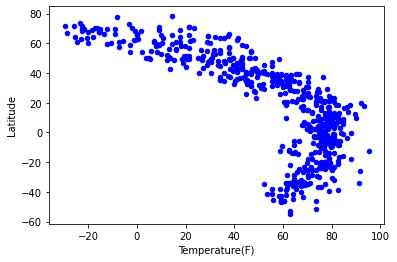

In [9]:
temp_plt = weather_df.plot.scatter(x='Temperature(F)',
                      y='Latitude',
                      c='blue')

plt.savefig('lat_v_temp.png')

In [10]:
#analyzing temp of each city according to lattitude

## Latitude vs. Humidity Plot

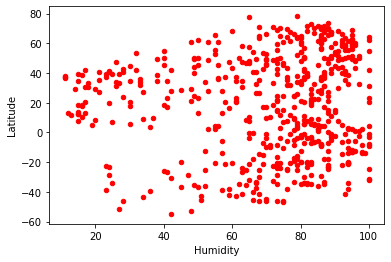

In [11]:
humidity_plt = weather_df.plot.scatter(x='Humidity',
                      y='Latitude',
                      c='Red')
plt.savefig('lat_v_humidity.png')

In [12]:
#analyzing humidity of each city according to lattitude

## Latitude vs. Cloudiness Plot

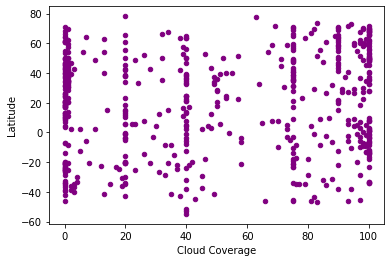

In [13]:
cloud_plt = weather_df.plot.scatter(x='Cloud Coverage',
                      y='Latitude',
                      c='Purple')
plt.savefig('lat_v_cloud.png')

In [14]:
# analyzing cloud coverage of each city according to lattitude

## Latitude vs. Wind Speed Plot

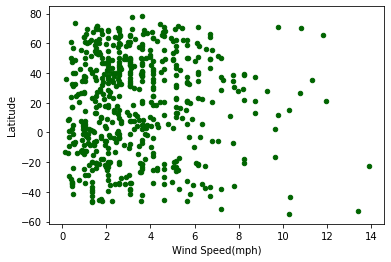

In [15]:
wind_plt = weather_df.plot.scatter(x='Wind Speed(mph)',
                      y='Latitude',
                      c='DarkGreen')
plt.savefig('lat_v_wind.png')

In [16]:
# analyzing cloud coverage of each city according to lattitude

## Linear Regression

In [17]:
# create new dataframes from weather_df for northern and southern hemispheres
southern_hemi_df = weather_df.loc[(weather_df['Latitude']) <= 0]
northern_hemi_df = weather_df.loc[(weather_df['Latitude']) >= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

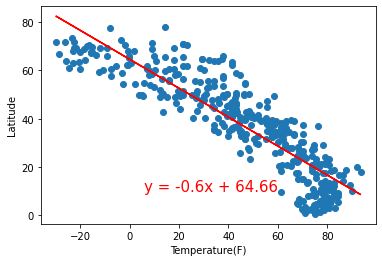

<Figure size 432x288 with 0 Axes>

In [18]:
# Add the linear regression equation and line to plot
x_values = northern_hemi_df['Temperature(F)']
y_values = northern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Temperature(F)')
plt.ylabel('Latitude')
plt.show()

plt.savefig('n_temp_regression.png')

In [19]:
#Temperatures rise as you approach the equator but huver around 80 degrees the close you get

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

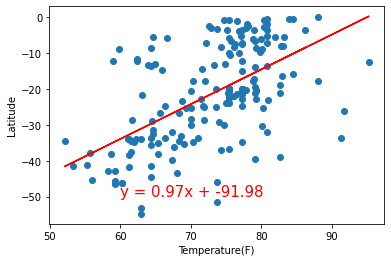

<Figure size 432x288 with 0 Axes>

In [20]:
# Add the linear regression equation and line to plot
x_values = southern_hemi_df['Temperature(F)']
y_values = southern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,-50),fontsize=15,color="red")
plt.xlabel('Temperature(F)')
plt.ylabel('Latitude')
plt.show()

plt.savefig('s_temp_regression.png')

In [21]:
#Temps are more spread out but mostly rise as you aproach the equator

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

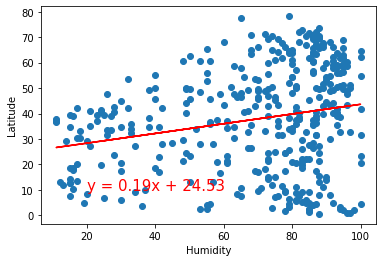

<Figure size 432x288 with 0 Axes>

In [22]:
# Add the linear regression equation and line to plot
x_values = northern_hemi_df['Humidity']
y_values = northern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()

plt.savefig('n_humidity_regression.png')

In [23]:
#Humidity, while varied along the latitudes, seems to rise the farther from the equator you go. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

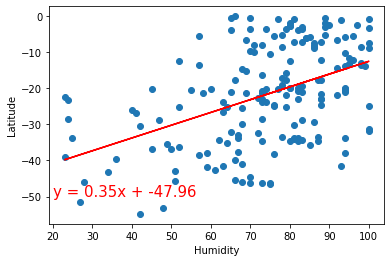

<Figure size 432x288 with 0 Axes>

In [24]:
# Add the linear regression equation and line to plot
x_values = southern_hemi_df['Humidity']
y_values = southern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-50),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()

plt.savefig('s_humidity_regression.png')

In [25]:
# Humidity ranges widely in the sounthern hemisphear with a general trend of rising near the equator

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

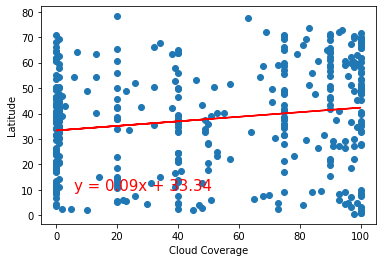

<Figure size 432x288 with 0 Axes>

In [26]:
# Add the linear regression equation and line to plot
x_values = northern_hemi_df['Cloud Coverage']
y_values = northern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloud Coverage')
plt.ylabel('Latitude')
plt.show()

plt.savefig('n_cloud_regression.png')

In [27]:
# Cloud coverage seems to have nothing to do with lattitude

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

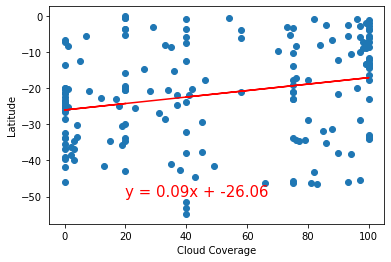

<Figure size 432x288 with 0 Axes>

In [28]:
# Add the linear regression equation and line to plot
x_values = southern_hemi_df['Cloud Coverage']
y_values = southern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-50),fontsize=15,color="red")
plt.xlabel('Cloud Coverage')
plt.ylabel('Latitude')
plt.show()

plt.savefig('s_cloud_regression.png')

In [29]:
# Cloud coverage seems to have nothing to do with lattitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

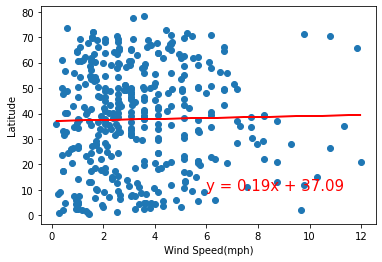

<Figure size 432x288 with 0 Axes>

In [30]:
# Add the linear regression equation and line to plot
x_values = northern_hemi_df['Wind Speed(mph)']
y_values = northern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed(mph)')
plt.ylabel('Latitude')
plt.show()

plt.savefig('n_wind_regression.png')

In [31]:
#Wind also seems to have little to do with latitude

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

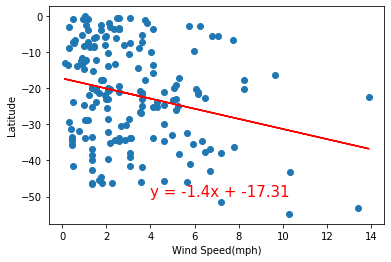

<Figure size 432x288 with 0 Axes>

In [32]:
# Add the linear regression equation and line to plot
x_values = southern_hemi_df['Wind Speed(mph)']
y_values = southern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,-50),fontsize=15,color="red")
plt.xlabel('Wind Speed(mph)')
plt.ylabel('Latitude')
plt.show()

plt.savefig('s_wind_regression.png')

In [33]:
#wind speed also seems to have little in common with latitude